In [1]:
from textblob import TextBlob

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
data = pd.read_csv("/content/data.csv" , sep='delimiter', header=None)
data = pd.DataFrame(data)

<ipython-input-2-1cebfc8783ef>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("/content/data.csv" , sep='delimiter', header=None)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9873 entries, 0 to 10915
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9873 non-null   object
 1   text    9873 non-null   object
 2   tokens  9873 non-null   object
dtypes: object(3)
memory usage: 308.5+ KB


In [11]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'@\w+','',text)
    #removes all text inside square brackets
    text = re.sub('\[.*?\]', '', text)
    #removes all URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    #removes all non-word characters
    text = re.sub('[\W_]+', ' ', text)  
    #removes all alphanumeric characters containing digits.  
    text = re.sub('\w*\d\w*', '', text)
    #removes all non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
 
    return text


In [19]:
data['text'] = data[0].apply(lambda x:clean_text(x))
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

data['text'] = data[0].apply(lambda x:decontract(x))



In [20]:
# replace empty strings with NaNs
data.replace('', pd.NA, inplace=True)

# drop all rows that have at least one missing value
data = data.dropna()



In [37]:
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

data['tokens'] = [txt.split() for txt in data['text']]

# Remove tokens which are part of the list of stop words
data['tokens'] = [[word for word in txt if word not in stoplist] for txt in data['tokens']]
df = data.drop(data[data['tokens'].apply(lambda x: len(x)) <4 ].index)
df = data.drop(data[data['tokens'].apply(lambda x: len(x)) >50 ].index)




In [22]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  if score <0 :
    return 'Negative'
  elif score ==0 : 
    return 'Normal'
  else : 
    return 'Pozitive'
data['subjectivity'] = data['text'].apply(getSubjectivity)
data['polarity'] = data['text'].apply(getPolarity)
data['Analysis'] = data['polarity'].apply(getAnalysis)

In [23]:
offensive_keywords = ['fuck', 'shit', 'damn', 'hell', 'asshole', 'bitch', 'dick', 'pussy','weak' ,'stupied','ugly' ,'fat' ,'loser' , 'annoying'  , 'slur' ,'homophobic' ,'rude' ,'whore' ,'fucker','bastard','bullshit','twat']

def label_tweet(tweet):
  if any(keyword in tweet for keyword in offensive_keywords):
            # If it does, check the sentiment of the tweet using sentiment analysis
            sentiment_score = TextBlob(tweet).sentiment.polarity
            # If the sentiment score is negative, label it as bullying
            if sentiment_score < 0:
                return 'bullying'
            # Otherwise, label it as normal
            else:
                return 'nonbullying'
  else: return 'nonbullying' 

data["label"] = data["text"].apply(label_tweet)           


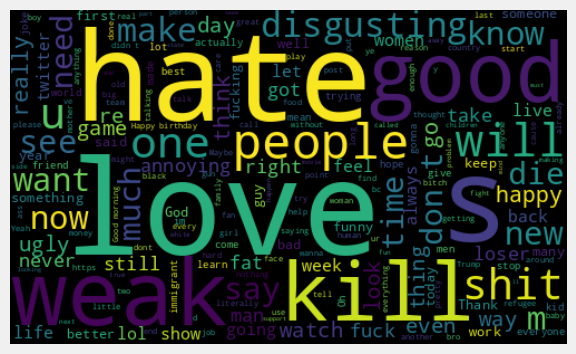

In [25]:
allWords = ' '.join(tweet for tweet in data['text'])
wordCloud = WordCloud(width = 500 , height=300 , random_state = 21 ,max_font_size = 119).generate(allWords)

plt.imshow(wordCloud , interpolation = "bilinear")
plt.axis('off')
plt.show()

In [26]:
data

 

,0,text,tokens,subjectivity,polarity,Analysis,label
0,1 - That shit is trash,1 - That shit is trash,"[1, -, That, shit, trash]",0.800000,-0.200000,Negative,bullying
1,2 - If y’all are pissed at who bands are touri...,2 - If y’all are pissed at who bands are touri...,"[2, -, If, y’all, are, pissed, bands, are, tou...",0.800000,-0.200000,Negative,bullying
2,3 - I’ve learnt that we fight for a right and ...,3 - I’ve learnt that we fight for a right and ...,"[3, -, I’ve, learnt, fight, right, then, celeb...",0.432143,0.142143,Pozitive,nonbullying
3,4 - keeping an eye on sf tech week!,4 - keeping an eye on sf tech week!,"[4, -, keeping, an, eye, on, sf, tech, week!]",0.000000,0.000000,Normal,nonbullying
4,"5 - It was long ngl, but at least mf was talki...","5 - It was long ngl, but at least mf was talki...","[5, -, It, was, long, ngl,, but, least, mf, wa...",0.400000,-0.175000,Negative,nonbullying
...,...,...,...,...,...,...,...
10910,873 - If you are lacking motivation on this Su...,873 - If you are lacking motivation on this Su...,"[873, -, If, you, are, lacking, motivation, on...",0.500000,0.136364,Pozitive,nonbullying
10912,’s praises! Such an incredible leader #CHV20,’s praises! Such an incredible leader #CHV20,"[’s, praises!, Such, an, incredible, leader, #...",0.700000,0.450000,Pozitive,nonbullying
10913,"874 - be a good day, wish me luck.","874 - be a good day, wish me luck.","[874, -, good, day,, wish, me, luck.]",0.600000,0.700000,Pozitive,nonbullying
10914,875 - A lot of restaurants are doing this “fan...,875 - A lot of restaurants are doing this “fan...,"[875, -, A, lot, restaurants, are, doing, this...",0.650000,0.050000,Pozitive,nonbullying


In [36]:
data.label.value_counts()

nonbullying    8967
bullying       1360
Name: label, dtype: int64